# **Задание 1:** Написать функцию для скрейпинга веб-страниц

In [ ]:
# импорт библиотек
import requests
from bs4 import BeautifulSoup

# функция для скрейпинга
def scrape_text_from_url(url, tag, class_=None):
  response = requests.get(url)  # Выполняем HTML-запрос
  if response.status_code == 200:  # Если запрос успешный
      soup = BeautifulSoup(response.content, 'html.parser')  # Парсим контент с помощью BeautifulSoup
      paragraphs = soup.find_all(tag, class_)  # Ищем теги и классы
      text = ""  # Инициализируем пустую строку для текста
      for p in paragraphs:  # Перебираем найденные элементы
          text += p.get_text() # + "\n"  # Извлекаем текстовые данные
      return text
  else:
      return f"Ошибка: запрос вернул статус-код {response.status_code}"

In [ ]:
'''
Проверяем функцию для скрейпинга: пример 1
'''

scrape_text_from_url('https://en.wikipedia.org/wiki/Flag_of_Russia', 'p')

'\n\nThe national flag of the Russian Federation (Russian: Государственный флаг Российской Федерации, Gosudarstvenny flag Rossiyskoy Federatsii) is a tricolour of three equal horizontal bands: white on the top, blue in the middle, and red on the bottom.\nThe design was first introduced by Tsar Peter the Great in 1693, and in 1705 it was adopted as the civil ensign of the Tsardom of Russia; the flag continued to be used as a civil ensign under the Russian Empire. In 1858, Emperor Alexander II declared the black-yellow-white tricolour as the national flag, and in 1896 it was replaced by the white-blue-red tricolour by Nicholas II. In 1917, following the October Revolution, the Bolsheviks banned the tricolour, though it continued to be flown by the White movement during the Russian Civil War. The flag of the Russian SFSR was a red field with its Cyrillic acronym "РСФСР" in the upper-left corner, and after 1954, was a red field with a vertical blue stripe on the left and a gold hammer and 

In [ ]:
'''
Проверяем функцию для скрейпинга: пример 2
'''

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.A staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.This violent tale of anaesthetised reporters is just a war yarn with a twist.This easy digital fakeness is there to get the audience used to it...Rather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.It’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.The film isn’t very deep, but it d

# **Задание 2:** Написать функцию для сентимент-анализа

In [ ]:
import re # регулярные выражения для чистки

'''
Загружаем списки слов с положительным и отрицательным значением
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt

with open('neg.txt', 'r', encoding='utf-8') as f:
  neg = f.read()

with open('pos.txt', 'r', encoding='utf-8') as f:
  pos = f.read()

with open('stopwords.txt', 'r', encoding='utf-8') as f:
  stopwords = f.read()

--2024-12-11 15:56:45--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.1’

neg.txt.1           100%[===================>]  43.71K  --.-KB/s    in 0.001s  

2024-12-11 15:56:45 (32.7 MB/s) - ‘neg.txt.1’ saved [44759/44759]

--2024-12-11 15:56:45--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savi

In [ ]:
'''
Создайте списки слов, разделив строку по знаку \n
'''

pos_list, neg_list = pos.split('\n'), neg.split('\n')

print(pos_list[:10])
print(neg_list[:10])

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [ ]:
'''
Допишите функцию для анализа тональности
Функция принимает на вход 3 аргумента:
  - переменную text с текстов для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''

def analyze_sentiment(text, positive_words, negative_words):
    # Приведите текст к нижнему регистру и поделите его на слова
    # Удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации

    no_punctuation = re.sub(r'[^\w\s]', '', text)
    no_spaces = re.sub(r'\s+', ' ', no_punctuation)
    words = no_spaces.lower().split() # Запишите результат в переменную words

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count: # если положительный скор больше отрицательного, возвращаем строчку 'positive'
      return 'positive'
    elif negative_count > positive_count: # если отрицательный скор больше положительного, возвращаем строчку 'negative'
      return 'negative'
    else: # Иначе возвращаем строчку 'neutral'
      return 'neutral'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

analyze_sentiment('This sample text is awesome!', pos_list, neg_list)


'positive'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 2
'''

analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 3
'''

analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

# **Задание 3:** Написать функцию для вывода сентимент-скоров

In [ ]:
'''
Допишите функцию для вывода скоров по заданному URL
'''

def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_) # примените функцию scrape_text_from_url
  sentences = scraped_text.split('.') # ваш код здесь: сегментируйте текст по предложениям (через точку)
  sentiments = [] # пустой список, куда запишем скоры

  for sentence in sentences: # начинаем перебор по предложениям
      sentence = sentence.strip()
      if sentence:  # предложение не пустое
        score = analyze_sentiment(sentence, positive_words, negative_words) # получаем скор для данного предложения с помощью функции analyze_sentiment
        sentiments.append(score)  # добавляем скор в созданный список

  return sentiments # возвращаем список скоров

In [ ]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative']

In [ ]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative']

# **Задание 4:** Визуализировать результаты анализа

In [ ]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

sample1

Counter({'neutral': 6, 'negative': 33, 'positive': 4})

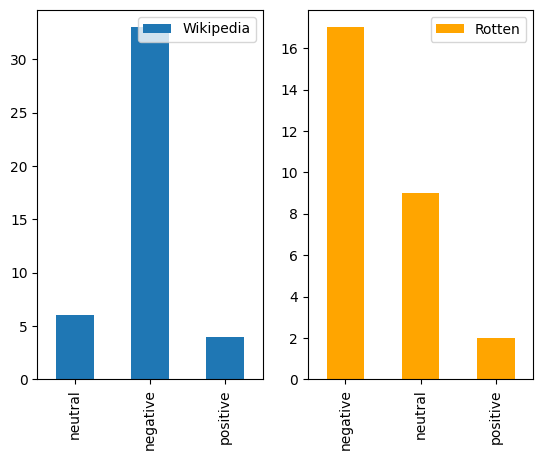

In [ ]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Wikipedia'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Rotten'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

# **Задание 5:** Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

In [16]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt

with open('neg.txt', 'r', encoding='utf-8') as f:
  neg = f.read()

with open('pos.txt', 'r', encoding='utf-8') as f:
  pos = f.read()

with open('stopwords.txt', 'r', encoding='utf-8') as f:
  stopwords = f.read()

# удаление знаков препинания, приведение к нижнему регистру и разделение по словам
def process_text(text):
    return re.sub(r'[^\w\s]', '', text).lower().split()

# Подсчет сентимента
def count_sentiment(words, positive_words, negative_words):
    # Сравнивает слова с позитивными и негативными списками и возвращает тональность
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

# 3 в 1
def three_in_one(url, tag, class_=None):
    """
    1. Скрейпинг текста с веб-страницы.
    2. Анализ общего сентимента.
    3. Анализ сентимента по предложениям.
    """
    # Шаг 1: Получение текста
    response = requests.get(url)
    if response.status_code != 200:
        return f"Ошибка №{response.status_code}"

    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all(tag, class_)
    text = " ".join([p.get_text() for p in paragraphs])
    print(f"Длина текста: {len(text)} символов")
    print()

    # Шаг 2: Сентимент
    words = process_text(text)
    overall_sentiment = count_sentiment(words, pos, neg)
    print(f"Эмоциональная окраска текста: {overall_sentiment}.")
    print()

    # Шаг 3: Анализ сентимента предложений
    sentences = text.split('.')
    sentence_sentiments = [
        count_sentiment(process_text(sentence), pos, neg)
        for sentence in sentences if sentence.strip()
    ]
    sentiment_counts = Counter(sentence_sentiments)
    print(f"Распределение сентимента по предложениям: {dict(sentiment_counts)}.")
    print()

    # Итог сентимента
    return {
        "Общий сентимент": overall_sentiment,
        "Сентимент по предложениям": sentence_sentiments,
        "Распределние сентимента": dict(sentiment_counts)
    }

# Запуск функции
three_in_one('https://cyber.sports.ru/cs/1116565514-donk-o-klatche-1-v-5-protiv-heroic-eto-kak-budto-byl-klatch-ot-simpla-.html', 'p')


--2024-12-11 20:41:13--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.6’

neg.txt.6           100%[===================>]  43.71K  --.-KB/s    in 0.001s  

2024-12-11 20:41:13 (45.9 MB/s) - ‘neg.txt.6’ saved [44759/44759]

--2024-12-11 20:41:13--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savi

{'Общий сентимент': 'negative',
 'Сентимент по предложениям': ['positive',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'neutral',
  'negative',
  'neutral',
  'negative',
  'positive',
  'positive',
  'neutral',
  'neutral',
  'neutral'],
 'Распределние сентимента': {'positive': 3, 'neutral': 11, 'negative': 2}}